In [2]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


quandl.ApiConfig.api_key = "hGma1YxsN1KzgB4gjgsi"

def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken = quandl.ApiConfig.api_key )
        print(query)
        df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        print(df.head())
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

def HPI_Benchmark():
    df = Quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
HPI_data = pd.read_pickle('fiddy_states.pickle')
HPI_State_Correlation = HPI_data.corr()

In [3]:
TX1yr = HPI_data['TX'].resample('A')
print(TX1yr.head())

Date
1975-12-31    33.936681
1976-12-31    36.398103
1977-12-31    40.044939
1978-12-31    45.962604
1979-12-31    53.347559
Freq: A-DEC, Name: TX, dtype: float64


C:\Users\Farhana_Fayez\Anaconda2\envs\wolt\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


C:\Users\Farhana_Fayez\Anaconda2\envs\wolt\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


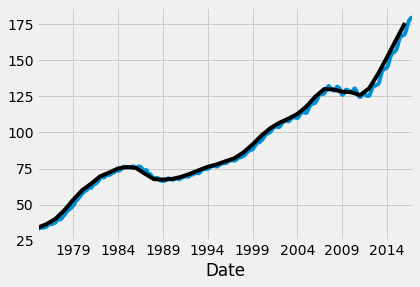

In [4]:
HPI_data['TX'].plot(ax=ax1)
TX1yr.plot(color='k',ax=ax1)

plt.legend().remove()
plt.show()